# *`08_Ensemble Learning`*

#### **What is Ensemble Learning ?**

\
Ensemble learning is a machine learning technique that is a combination of the predictions of multiple models to increase the accuracy of predictions. The main idea behind ensemble learning is to combine the strengths of diverse models to elevate overall performance.

* It is a grouping of different Machine Learning Algorithms.
* Ensemble learning is totally based on the `wisdom of crowd` principle.
* It means the crowd knows more than an individual.

\
**Core Idea**

Ensemble learning differs in the way it works for below phases:
1. Training
2. Prediction

#### **1. Training**

Ensemble learning can be applied in the following ways:
1. Using same algorithm but different data.

$$M_1 = M_2 = M_3 .... = M_n$$

2. Using different algorithm but same data.

$$M_1 \neq M_2 \neq M_3 .... \neq M_n$$

3. Using different algorithm and different data.

\
> ***Prediction for Classification setting***

Let's say a new query point $x_p$ comes, we will pass it to all the models:

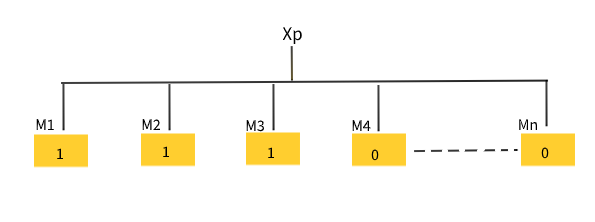

e.g: We have created an Ensemble of 5 models.
* 3 models have predicted $'1'$ for the data point $x_p$.
* 2 models have predicted $'0'$ for the data point $x_p$.

The overall outcome will depend on majority. Hence, the output will be $'1'$.

\
> ***Prediction for Regression setting***

For a regression setting, the prediction is a continuous number therefore, we take the mean of the outputs.

$\text {final prediction} = \sum_{i = 1}^{n} \frac {Prediction_i}{n}$

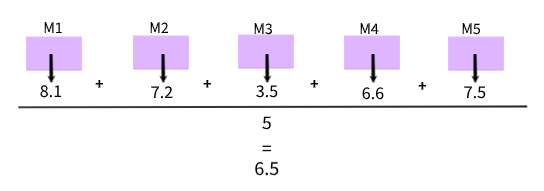

\
### **Types of Ensemble Learning**
1. Voting Ensemble
2. Bagging Ensemble -(Random Forest)
3. Boosting Ensemble - (Gradient Bossting, AdaBoost,, XGBoost)
4. Stacking

\
### Why Ensemble Works?

It takes multiple models and removes the noise as much as possible.

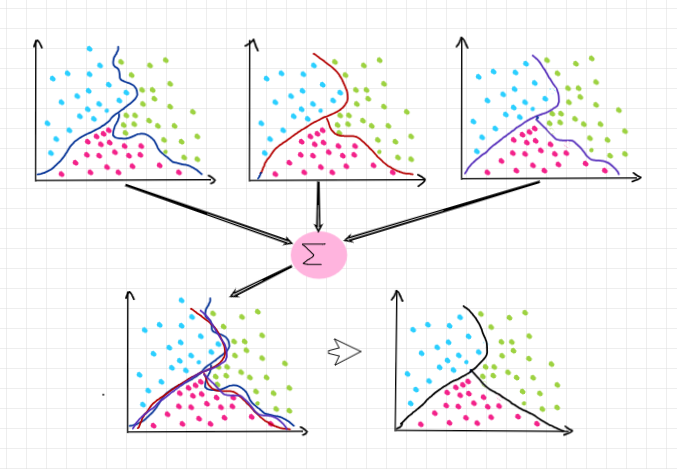

\

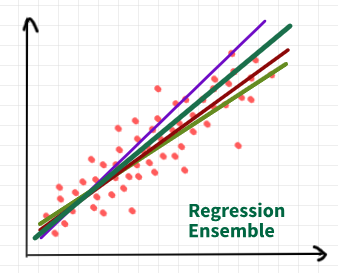

\
**Benefits**
1. Improvements in performance
2. Bias Variance is reduced - (low bias and low variance)
3. Robustness




## **Voting Ensemble**

**Core Idea** The data is provided to $n$ no. of models.

Base models are different algorithms.The data provided for to the algorithms is same.

<image>

> **ASSUMPTIONS FOR VOTING**

* The base models should be as dissimilar as possible.
* If models are similar Voting wouldn't work.
* Individual models should have accuracy greater than 51%

> **Mathematical Intuition**

Let's say we have an Ensemble of 3 models for a classification problem with 2 classes - $M1, M2 \text { and } M3$

> $\text {prob of right} = 0.4 \\
\text {prob of right} = 0.6 $

Below are the all possible outcomes of the models with above probabilities:

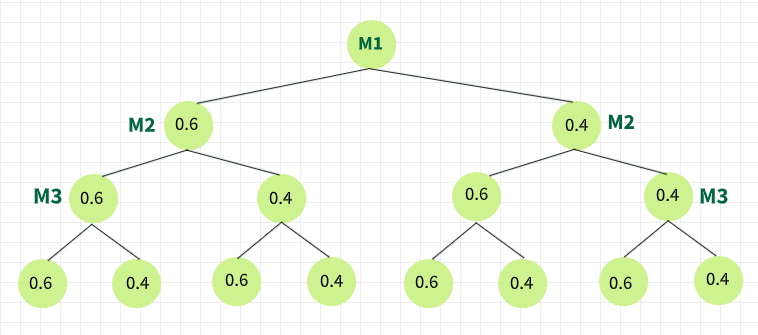       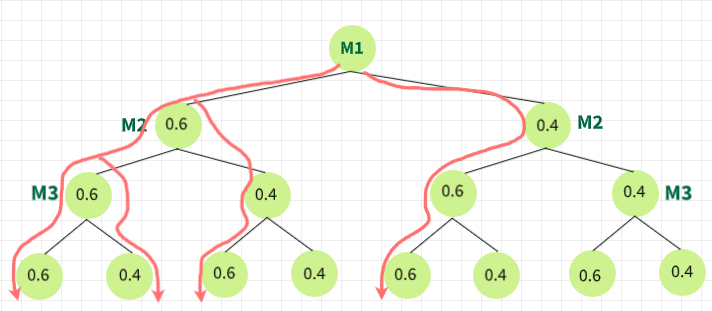

For the voting algorithm to work, we need cases where the individual accuracy was above $50%$ and two classifiers with same accuracy. We get 4 such cases as mentioned:

| M1(acc)>50% | M2(acc)>50% | M3(acc)>50% | Total Accuracy |
| --- | --- | --- | --- |
| 0.6 | 0.6 | 0.6 | 0.216 |
| 0.6 | 0.6 | 0.4 | 0.144 |
| 0.6 | 0.4 | 0.6 | 0.144 |
| 0.4 | 0.6 | 0.6 | 0.144 |
| --- | --- | --- | --- |
| **Total** | **Model** | **Accuracy:**| **0.648 ~ 64%**|

If we take the indiviual accuracies less than 50%, overall accuracy would also appear to be less. Let's check the cases where individual accuracy is less than 50% with majority:

| M1(acc)<50% | M2(acc)<50% | M3(acc)<50% | Total Accuracy |
| --- | --- | --- | --- |
| 0.4 | 0.4 | 0.4 | 0.064 |
| 0.4 | 0.4 | 0.6 | 0.096 |
| 0.4 | 0.6 | 0.4 | 0.096 |
| 0.6 | 0.4 | 0.4 | 0.096 |
| --- | --- | --- | --- |
| **Total** | **Model** | **Accuracy:**| **0.352 ~ 35%** |

\
> **Hard Voting Vs. Soft Voting**

This is a hyperparameter we need to tune it.

| |Hard Voting | Soft Voting |
| --- |--- | --- |
|1. | In hard voting, we compare the probabilties of each class. | In soft voting, we find the mean of probabilities for each class. |
|2. | The class with higher probabilties will be outputted. | The class with higher probability will be selected as teh output. |


### Import libraries

In [42]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree, DecisionTreeClassifier, DecisionTreeRegressor
from mlxtend.plotting import plot_decision_regions

In [ ]:
# Lets check an example of how voting ensemble works
iris_data = datasets.load_iris()

# Turn the raw data into a pandas dataframe
df = pd.DataFrame(iris_data['data'], columns = iris_data['feature_names'])
df['target'] = iris_data['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [ ]:
# Split the data into X and y
X = df.drop('target', axis = 1)
y = df['target']

In [ ]:
# Instantiate the objects of the classifiers going to be the part of ensembling
clf1 = LogisticRegression(max_iter = 200)
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

# Create a list of estimators consisting of the algorithms for ensemble
estimators = [('lr' , clf1), ('rf', clf2), ('knn', clf3)]

# Initiate an object of Voting CLassifier
voting_classifier = VotingClassifier(estimators = estimators, # Hyperparameters
                                     voting = 'hard',
                                     weights = [1, 2, 3]) # importance given for each model's prediction

# Find the cross validation score
cv = cross_val_score(voting_classifier,
                     X, y,
                     scoring = 'accuracy')

# Print the score
print(f'Accuracy Score: {np.round(np.mean(cv), 2)}')

Accuracy Score: 0.98


## **Bagging Ensemble**

**Core idea** Bagging is the combination of Bootstrapping and Aggregation.

> **Boostrapping**

It is a technique of drawing random samples from a given population `(with/ without replacement)`.

All the models in bagging ensemble should be same.

* The base models in bagging ensembles are models having `Low Bias and High Variance`, such as: SVM, KNN, DT, etc.
* Even if the data is changed, it will not create huge impact on output because of bootstrapping, as new data points will be distributed.

> **Bagging**

Row sampling with replacement. e.g. `df.sample(replace = True)`

> **Pasting**

Row sampling without replacement. e.g. `df.sample()`

> **Random subspaces**

Column sampling with/ without replacement. e.g. `df.sample(2, replace = True, axis = 1)`

> **Random Patches**

Row sampling and column sampling. e.g. `df.sample(8, replace = True).sample(2, replace = True, axis = 1)`

Mostly we use - Decision Trees or KNearestNeighbors. Rarely, Support Vector Machines are used.


**Important Points**

* Bagging generally gives better results than pasting.
* Good results come around the 25% to 50% row sampling.
* Random patches and subspaces should be used while dealing with high dimensional data.
* To find correct hyperparameter use GridSearchCV, RandomSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize BaggingClassifier
bag_clf = BaggingClassifier(estimator=KNeighborsClassifier(),
                            bootstrap=False,
                            n_estimators=10,
                            random_state=0)

# Fit the BaggingClassifier
bag_clf.fit(X, y)

print(f'Accuracy Score: {bag_clf.score(X,y)}')

# Print estimator samples
print(f"Estimator Samples : \n{bag_clf.estimators_samples_}")
# Print estimator features
print(f"\n\nEstimator Features : \n{bag_clf.estimators_features_}")

Accuracy Score: 0.9666666666666667
Estimator Samples : 
[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149]), array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18

## **Random Forest**

Random Forest trains multiple Decision Trees at once. The word Random comes from a fact that it is a bagging ensemble. It can be used for both regression and classification problems.

When the base estimator is selected as Decision Trees in Bagging, then it becomes Random Forest Algorithm.

let's say you have 1000 rows in your dataset and the randopm forest consists of 100 Decision trees.

$Dataset = 1000$

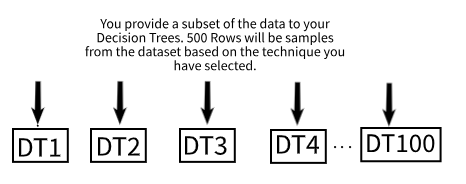

\
You provide a subset of the data to the decision trees. They are samples from the data. Sampling of data can be done is two ways:
1. Row Sampling : Randomly selecting $n$ rows as D1.
  
  * with replacement - Rows may appear more than once.
  * without replacement - Rows are not repeated (unique set).

2. Column Sampling : Randomly selecting $m$ columns columns as $D2$ also called Feature Sampling.

  * with replacement - Columns may appear more than once.
  * without replacement - Columns are not repeated (unique set).

3. Column and Row sampling : Combined sampling

\
#### How Random Forest performs so well ?

In Machine Learning, we strive for optimal performance, i.e., `Low Bias Low Variance`.
$$Bias \propto \frac {1}{variance}$$

Since, Bias is inversely proportional to Variance therefore, machine learning models struggle with Bias Variance trade off and deviding into two classes:

* Low Bias High Variance: e.g. Fully grown Decision trees, Support Vector Machine, KNeareast Neighbors.
* High Bias Low Variance: e.g. Linear Regression, Logistic Regression


> This is where Random Forest comes into play. If we provide a `Low Bias High Variance` algorithm, it converts the algorithm into `Low Bias Low Variance` by keeping the bias of the model intact it lowers the variance.

The **Random Forest** does it is, it takes base models to be fully grown decision trees, which are `Low Bias High Variance` algorithms (performs well on training data but makes mistake on new data).   

\

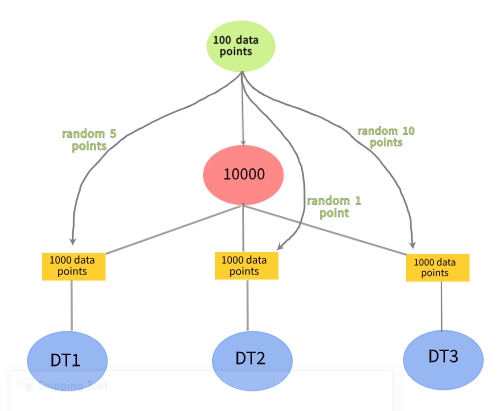

\
* We take the data and provide the subset of the data to the models. let's say we have 10000 rows in our data and we input the subsets of 1000 rows to each model.
* The models are still decision trees so, it will still have `Low Bias` but something interesting happens with variance.
* Let's say we have replaced 100 rows from the data which are totally different from the data we trained Random forest (noisy data/outliers).
* Since, Random Forest is a collection of decision trees and the new points are replaced in a small quantity, the chances of all new data points being inputted to a single tree is very low because we are sampling the data randomly.
* It spreads among the trees and hence, it does not affects the output much resulting in reduced variance.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def function(x):
    return np.cos(x) + 1.5 * np.exp(-x ** -2) + 1.030 * np.exp(-x ** -2)

# Generate nonlinear data with noise
def generate_nonlinear_data(n_samples_train, noise):
    # Generate random x values
    X = np.random.rand(n_samples_train) * 10 - 5

    # Generate y values with added noise
    y = function(X) + np.random.normal(0.0, noise, n_samples_train)

    return X, y

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples_train = 100
n_samples_test = 500

# Level of noise
noise = 0.152

# Generate nonlinear data
X_train, y_train = generate_nonlinear_data(n_samples_train, noise)
X_test, y_test = generate_nonlinear_data(n_samples_test, noise)

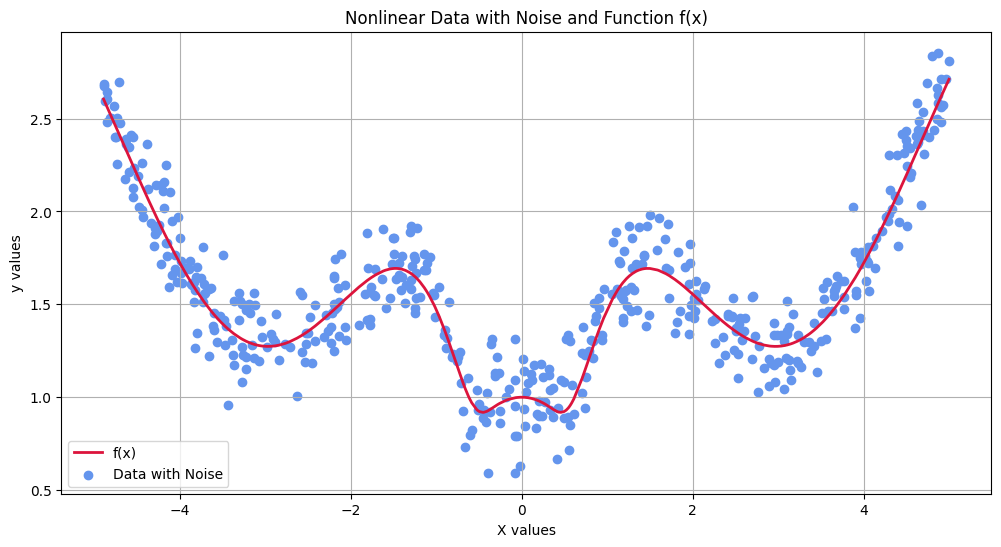

In [ ]:
# Sort the data points based on X_train and X_test
sorted_indices_train = np.argsort(X_train)
X_train_sorted = X_train[sorted_indices_train]
y_train_sorted = y_train[sorted_indices_train]

sorted_indices_test = np.argsort(X_test)
X_test_sorted = X_test[sorted_indices_test]
y_test_sorted = y_test[sorted_indices_test]

# Plot the generated data and the function f(x)
plt.figure(figsize=(12, 6))
plt.plot(X_test_sorted, function(X_test_sorted), color='crimson', linewidth=2, label='f(x)')
plt.scatter(X_test_sorted, y_test_sorted, color='cornflowerblue', label='Data with Noise')
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Nonlinear Data with Noise and Function f(x)')
plt.legend()
plt.grid(True)
plt.show()

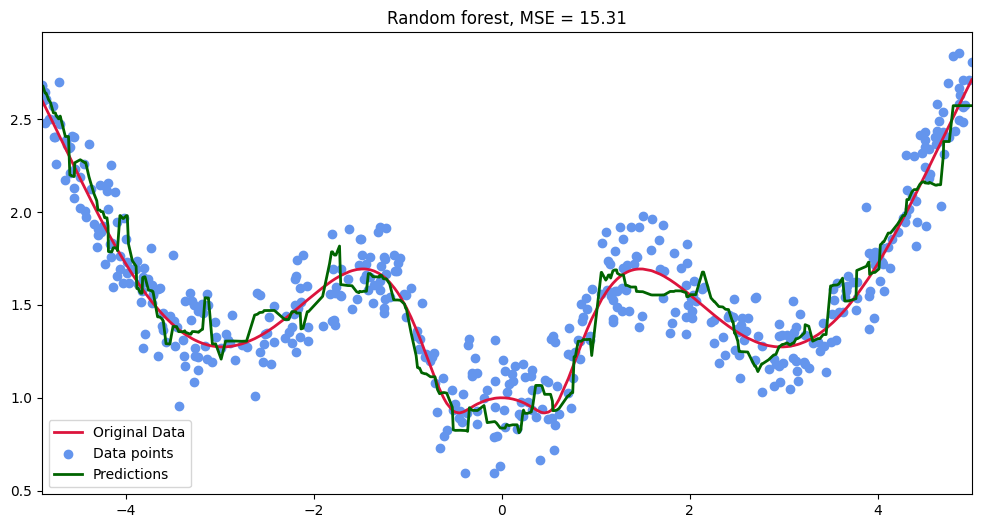

In [ ]:
# Create a Random Forest regressor and print its OOB score
rfr = RandomForestRegressor(n_estimators=1000, oob_score=True).fit(X_train.reshape(-1, 1), y_train)
rf_predict = rfr.predict(X_test.reshape(-1, 1))

# Plot the sorted data
plt.figure(figsize = (12,6))
plt.plot(X_test_sorted, function(X_test_sorted) , "crimson", label="Original Data",lw=2)  # Original data
plt.scatter(X_test, y_test, c="cornflowerblue", label = 'Data points')  # Scatter plot of data points
plt.plot(X_test_sorted, rf_predict[sorted_indices_test], "darkgreen",lw=2, label = 'Predictions')  # Predictions from random forest
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2))
# Set x-axis limits
plt.legend()
plt.xlim([X_test.min(), X_test.max()])
plt.show()

> **OOB Score**

Out of bag samples. Based on the statistics, 63% of data points are used in sampling with replacement. 37% of data points are not used in any of Decision Trees. We can use them as test data.

In [ ]:
# Print the OOB score
print(rfr.oob_score_)

0.8636560335981905


> **Feature Importance Using Decision Trees & Random Forest**

**Feature Importance** It finds the most important features/columns.

**Feature Selection** Finds the most import features for the model.

* The most important features will be responsible for the model's output.
* It also tells how the model becomes interpretable.

\
> **Decision Tree - Feature Importance**

$ n_i = \frac {N_{nrows}-t}{N_{total}}  [\text { impurity } - ( \frac {N_{right rows}-t-r}{N-t}) \text { x } (\text { right impurity }) - (\frac {N_{left rows}-t-l}{N-t}) \text { x } (\text { left impurity })]$

\
$$f_{i_k} = \frac {\sum_{j \in \text { node split on feature k }} n_i}{\sum_{j \in \text { all nodes }}n_i}$$

Where,

* $N_{total}$ = No. of rows

* $impurity$ = Gini Impurity

* $N-t-r$ = Right node rows

* $N-t-l$ = Left node rows


In random forest individual trees calculate individually the feature importances and then it is averaged.

In [ ]:
# Find the most important features
print(rfr.feature_importances_)

[1.]


## Boosting Ensemble

Models used for ensembling in a boosting algorithm are same. The data is given to first model. The model makes predictions and the ones which are wrong are then passed to the next model. This model tries to correct them. The process is continued till the desired accuracy is achieved.

### AdaBoost Ensemble

AdaBoost is an ensemble learning method that combines several weak learners into a strong learner to reduce training errors.

* **Weak learner:** A weak learner has the accuracy of nearly 50%.
* **Decision Stumps:** Decision stump is a decision tree with `max_depth = 1`. It can put only 1 split at a time.

Usually, the splits which reduces the entropy are selected.

### ***`The Big Idea`***

AdaBoost is a stage-wise additive method. AdaBoost is made by adding multiple weak learners.

\

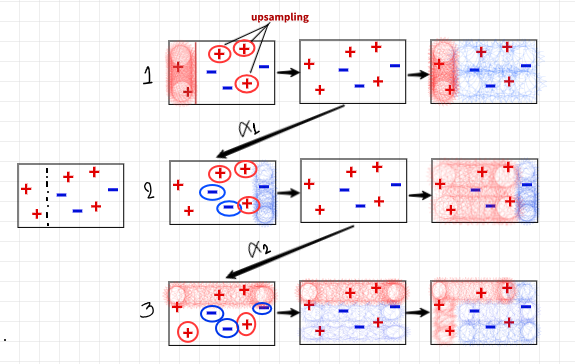

\

$$\text {Adaboost Function} = [ \alpha_1 h_1(x) + \alpha_2 h_2(x) + \alpha_3 h_3(x) ]$$

1. We start by drwaing an initial data stump. Identify the points correctly classified by checking whether they are present in positive region or negative region.
2. The data points which were misclassified, will have increased importance.
3. The **1st stage** will be drawing a datastump. The model will be assigned an $\alpha$ value (weightage) based on number of correct predictions or how well the model performs.
4. Similarly, The process is followed for stages till the desired accuracy.

### AdaBoost Step by Step

Initially, all the rows are assigned with same weightage:

$$\frac {1}{n} = \frac {1}{5} = 0.2$$

\

| | x1 | x2 | y | weight(α)
|--- | --- | --- | --- | --- |
|1. | 3 | 7 | 1 | 0.2 |
|2. | 2 | 9 | 0 | 0.2 |
|3. | 1 | 4 | 1 | 0.2 |
|4. | 9 | 8 | 0 | 0.2 |
|5. | 3 | 7 | 0 | 0.2 |


\

**Stage 1(M1):** $ x_1 \gt 5 \text { or } x_1 \lt 10$

We select the stump which is giving the best output on this data.

|    | x1  | x2  | y   |ypred|weight(α)| Updated W |
|--- | --- | --- | --- | --- | --- | --- |
|1. | 3 | 7 | 1 | 1 | 0.2 | 0.16 |
|2. | 2 | 9 | 0 | 1 | 0.2 | 0.24 |
|3. | 1 | 4 | 1 | 0 | 0.2 | 0.24 |
|4. | 9 | 8 | 0 | 0 | 0.2 | 0.16 |
|5. | 3 | 7 | 0 | 0 | 0.2 | 0.16 |

$\alpha_1$ = error rate. The lesser the value the better is the model.

$\begin{equation*}
\text {error rate} = \begin{cases}
a : 0 \text {%} : \text {Always correct}   \\
b : 100 \text {%} : \text {Always wrong}  \\
c : 50 \text {%}
\end{cases}
\end{equation*}$

\

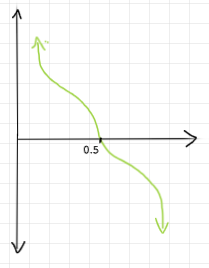

\

$\alpha$ is calculated as follows:

$$\alpha = \frac {1}{2 } \ln (\frac {1 - error}{error})$$

M1 = weights of wrong predictions:

>$0.2 + 0.2  = 0.4 = error \\
\alpha_1 = \frac {1}{2 } \ln (\frac {1 - 0.4}{0.4}) = 0.20$

**Stage 2:** The points which are misclassified in `Stage 1` will have increased importance in `Stage 2` with a technique called **`Upsampling`**.

> **Upsampling:** \
For the correctly classified points, the weight will be reduced.\
For wrong predictions, weights will be increased.

> **Weight Update**

* For misclassfied points
$$new_{weight} = current_{weight} * e^{\alpha_1}$$\
$weight = 0.2 * e^{0.2} = 0.24$

* For correctly classified points
$$new_{weight} = current_{weight} * e^{-\alpha_1}$$\
$weight = 0.2 * e^{-0.2} = 0.16$

\
The total weight should equal to 1 hence you normalize the weights.
Create the range of weights by adding new weights as follows:

| Row num | x1  | x2  | y   |ypred|weight(α)| Updated W | Normalized weights |Range |
|--- | --- | --- | --- | --- | --- | --- | --- |--- |
|1 | 3 | 7 | 1 | 1 | 0.2 | 0.16 | 0.166 |0 - 0.166|
|2 | 2 | 9 | 0 | 1 | 0.2 | 0.24 | 0.25 |0.166 - 0.416 |
|3 | 1 | 4 | 1 | 0 | 0.2 | 0.24 | 0.25 |0.416 - 0.666 |
|4 | 9 | 8 | 0 | 0 | 0.2 | 0.16 | 0.166 |0.666 - 0.832 |
|5 | 3 | 7 | 0 | 0 | 0.2 | 0.16 | 0.25 |0.832 - 1.0 |
| **Total** | --- | --- | --- | --- | --- | **0.96** | --- |--- |

We need boost the incorrect predictions. To do so, we perform upsampling by generating $n$ random numbers between 0 - 1. In our case we generate 5:

| n | random number| check range  | row num|
| ---| --- | --- | --- |
| 1 | 0.13| 0 - 0.166  | row 1    |
| 2 | 0.43| 0.416 - 0.666  | row 3 |
| 3 | 0.62| 0.416 - 0.666  | row 3 |
| 4 | 0.50| 0.416 - 0.666  | row 3 |
| 5 | 0.8 | 0.666 - 0.832  | row 4 |

The new dataset would be the rows: {1, 3, 3, 3, 4}. Since, we are using range for picking rows, the chances are that whatever rows have high range that row will be selected. This is **upsampling**.

{1, 3, 3, 3, 4} these  rows will be used for *Stage 2*.

In [ ]:
# Lets create a class to represent how AdaBoost classifier works
class AdaBoostClassifier:

    def __init__(self, df, x, y):
        self.x = x
        self.y = y
        self.dataframe = df
        self.alphas = []

    def plot_function(self, dtree):
        # Create a plotting function
        plt.figure(figsize=(15, 6))
        plt.subplot(1, 2, 1)
        plot_tree(dtree)
        plt.title('Tree diagram')

        plt.subplot(1, 2, 2)
        plot_decision_regions(self.x, self.y, clf=dtree, legend=2)
        plt.title("Plotting the decision boundaries")

    def classify(self):

        # Step:1 Set the weights to 1/n
        self.dataframe['weights'] = 1 / self.x.shape[0]

        # Step 2: Assign the decision tree with max depth = 1
        dtree = DecisionTreeClassifier(max_depth=1)
        dtree.fit(self.x, self.y)

        # Step 3: Make the predictions
        self.dataframe['y_preds'] = dtree.predict(self.x)

        # Step 4: Get the wrong predictions
        self.dataframe = self.get_wrong_preds()

        # Step 5: Create new dataset from the old dataset afterr upsampling
        index_values = self.create_new_dataset()
        new_dataframe = self.dataframe.iloc[index_values]

        # Plot the fitted tree plot the decision regions
        self.plot_function(dtree)

        return self.dataframe, new_dataframe

    # Calculate the model weight
    def calculate_weight_error(self, error):
        return 0.5 * np.log((1 - error) / error)

    def get_wrong_preds(self):
        # Get the rows of wrong prediction and find the alpha value
        wrong_preds = self.dataframe[self.dataframe['label'] != self.dataframe['y_preds']]

        error = wrong_preds['weights'].sum()
        alpha = self.calculate_weight_error(error)
        self.alphas.append(alpha)
        self.dataframe = self.update_weights(alpha)

        return self.dataframe

    def update_weights(self, alpha):

        # update the weight values for correct and incorrect predictions
        for index, row in self.dataframe.iterrows():

            if row['label'] == row['y_preds']:
                # For correct predictions
                self.dataframe.at[index, 'updated_weights'] = row['weights'] * np.exp(-alpha)

            else:
                # For incorrect predictions
                self.dataframe.at[index, 'updated_weights'] = row['weights'] * np.exp(alpha)

        # Normalize the updated weights
        self.dataframe['normalized_weights'] = self.dataframe['updated_weights'] / self.dataframe[
            'updated_weights'].sum()
        return self.dataframe

    def create_range(self, dataframe):
        # Create a range of cumulative sum of the weights
        self.dataframe['upper_range'] = np.cumsum(dataframe['normalized_weights'])
        self.dataframe['lower_range'] = self.dataframe['upper_range'] - self.dataframe['normalized_weights']

        return self.dataframe

    def create_new_dataset(self):
      # Create the new dataframe
        df = self.create_range(self.dataframe)
        indices = []

        # Run the loop for n times i.e the number of rows in the data
        for i in range(df.shape[0]):
            a = np.random.random() # Generate the random number at each iteration
            for index,row in df.iterrows():
                if row['upper_range'] > a and a > row['lower_range']: # Check where the random number lies and identify the index
                    indices.append(index)
        return indices

In [ ]:
# Get the data
data = { 'X1' : [1,2,3,3,4,2,4,5,6,6,6],
         'X2' : [5,6,6,2,4,2,7,4,1,3,3],
         'label' : [1,1,0,0,0,1,0,1,1,0,1]}

# turn the data into a dataframe
sample_data = pd.DataFrame(data)
sample_data

,X1,X2,label
0,1,5,1
1,2,6,1
2,3,6,0
3,3,2,0
4,4,4,0
5,2,2,1
6,4,7,0
7,5,4,1
8,6,1,1
9,6,3,0


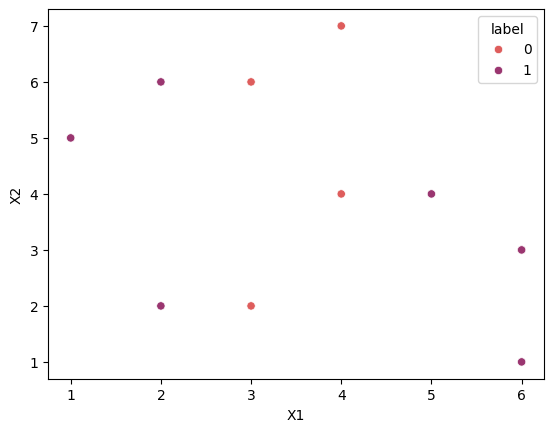

In [ ]:
# Plot the data
import seaborn as sns
sns.scatterplot(x = sample_data['X1'], y = sample_data['X2'], hue = sample_data['label'], palette = 'flare')
plt.show()

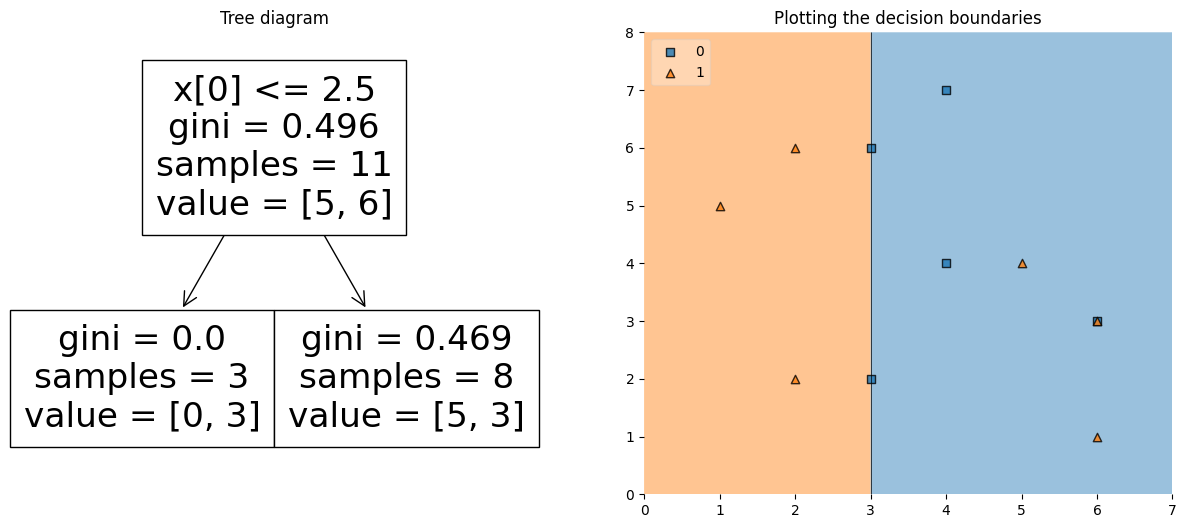

In [ ]:
# Split the data into X and y
sample_data_X = sample_data.iloc[:,:2].values
sample_data_y = sample_data.iloc[:,-1].values

# Run the adaboost classifier
adaboost = AdaBoostClassifier(sample_data, sample_data_X, sample_data_y)
df, new_df = adaboost.classify()

In [ ]:
# Check the dataframe with new columns added
df

,X1,X2,label,weights,y_preds,updated_weights,normalized_weights,upper_range,lower_range
0,1,5,1,0.090909,1,0.055670,0.062500,0.062500,0.000000
1,2,6,1,0.090909,1,0.055670,0.062500,0.125000,0.062500
2,3,6,0,0.090909,0,0.055670,0.062500,0.187500,0.125000
3,3,2,0,0.090909,0,0.055670,0.062500,0.250000,0.187500
4,4,4,0,0.090909,0,0.055670,0.062500,0.312500,0.250000
5,2,2,1,0.090909,1,0.055670,0.062500,0.375000,0.312500
6,4,7,0,0.090909,0,0.055670,0.062500,0.437500,0.375000
7,5,4,1,0.090909,0,0.148454,0.166667,0.604167,0.437500
8,6,1,1,0.090909,0,0.148454,0.166667,0.770833,0.604167
9,6,3,0,0.090909,0,0.055670,0.062500,0.833333,0.770833


In [ ]:
# View the new df
new_df

,X1,X2,label,weights,y_preds,updated_weights,normalized_weights,upper_range,lower_range
6,4,7,0,0.090909,0,0.055670,0.062500,0.437500,0.375000
8,6,1,1,0.090909,0,0.148454,0.166667,0.770833,0.604167
8,6,1,1,0.090909,0,0.148454,0.166667,0.770833,0.604167
8,6,1,1,0.090909,0,0.148454,0.166667,0.770833,0.604167
1,2,6,1,0.090909,1,0.055670,0.062500,0.125000,0.062500
2,3,6,0,0.090909,0,0.055670,0.062500,0.187500,0.125000
1,2,6,1,0.090909,1,0.055670,0.062500,0.125000,0.062500
7,5,4,1,0.090909,0,0.148454,0.166667,0.604167,0.437500
10,6,3,1,0.090909,0,0.148454,0.166667,1.000000,0.833333
6,4,7,0,0.090909,0,0.055670,0.062500,0.437500,0.375000


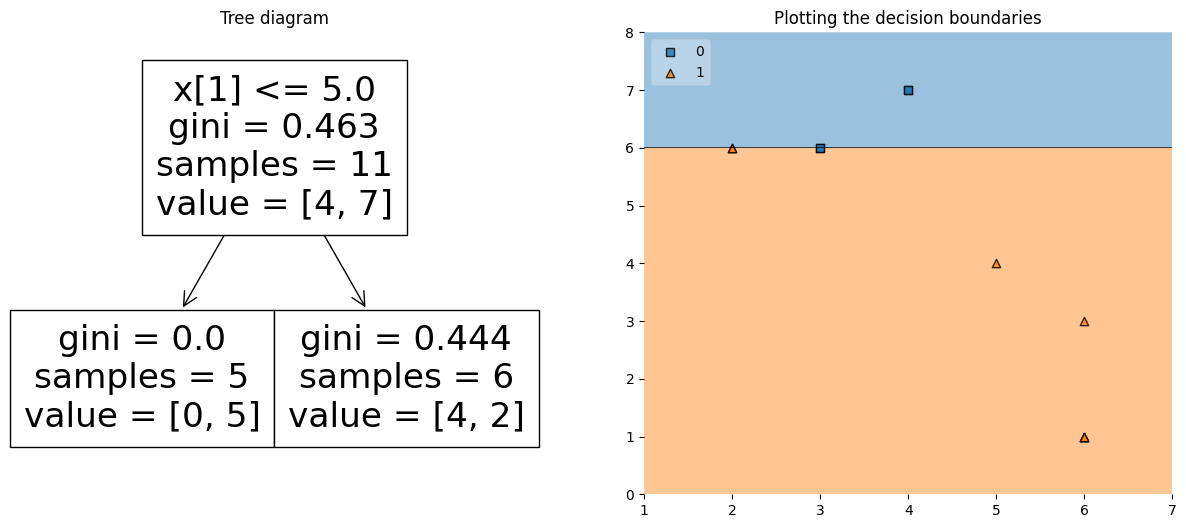

In [ ]:
# Split the new data into X and y
data_X_1 = new_df.iloc[:,:2].values
data_y_1 = new_df.iloc[:,2].values

# Now provide the new_df dataset to the Adaboost model
adaboost_1 = AdaBoostClassifier(new_df, data_X_1, data_y_1)
df_1, new_df_1 = adaboost_1.classify()

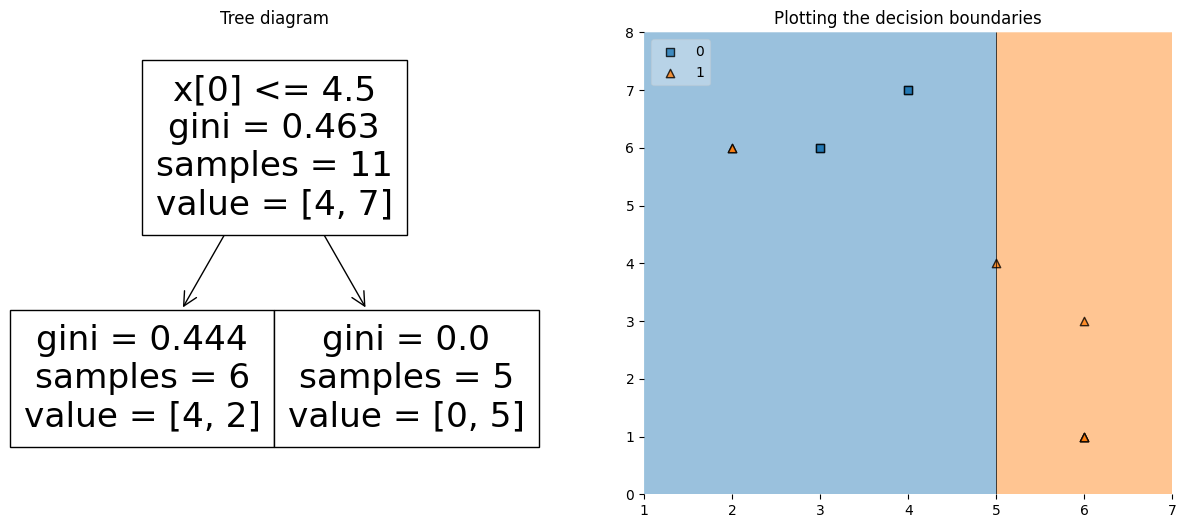

In [ ]:
# Split the new data into X and y
data_X_2 = new_df_1.iloc[:,:2].values
data_y_2 = new_df_1.iloc[:,2].values

# Now provide the new_df dataset to the Adaboost model
adaboost_2 = AdaBoostClassifier(new_df_1, data_X_1, data_y_1)
df_2, new_df_2 = adaboost_2.classify()

<ipython-input-14-38ddbafaaeba>:47: RuntimeWarning: divide by zero encountered in scalar divide
  return 0.5 * np.log((1 - error) / error)


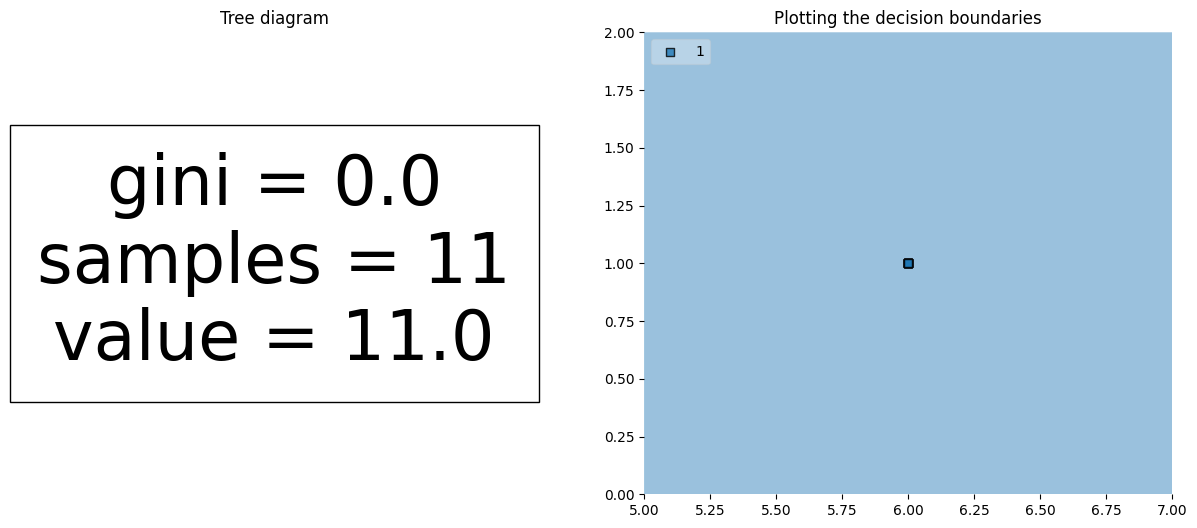

In [ ]:
# Split the new data into X and y
data_X_3 = new_df_2.iloc[:,:2].values
data_y_3 = new_df_2.iloc[:,2].values

# Now provide the new_df dataset to the Adaboost model
adaboost_3 = AdaBoostClassifier(new_df_2, data_X_3, data_y_3)
df_3, new_df_3 = adaboost_3.classify()

#### Adaboost Hyperparameters

**1. base_estimator** Different algorithms can be used here. Usually, decision trees gives better results.

**2. n_estimators** How many base esitmators to are needed. High value will lead to overfitting.

**3. Learning rate** Weight applied to each boosting iteration. A higher learning rate increases the contribution of each classifier.

**4. Algorithm** SAMME, SAMME R

### Gradient Boosting

Gradient Boosting is stage-wise sequential addition of multiple models. The mistakes made by previous models are forwarded to consecutive models for better predictions. It does not use `decision stumps` as in `Adaboost`. Instead, models are trained at each stage to make predictions.


>**Gradient Boosting in regression**

* In regression, the first model is simply the mean of the model.

|    |  iq | cgpa  | salary   |M1 pred| pseudo residual| M2 pred |
|--- | --- | --- | --- | --- | --- | --- |
|1. | 101 | 6 | 3 | 5 |  |  |
|2. | 99 | 9 | 4 | 5 |  |  |
|3. | 95 | 4 | 3 | 5 |  |  |
|4. | 108 | 8 | 8 | 5 |  |  |
|5. | 106 | 9 | 7 | 5 |  |  |

* **model 1 (M1)** It is the mean of output column
m1 = $\frac {(3 + 4 + 3 + 7 + 8)}{5} = \frac {25}{5} = 5$


We need a loss function to find out mistakes and feed it to the next model.

$loss = actual - predicted ==> pseudoresid$

* **model 2 (M2)** It will be decision tree whose input will be **IQ and CGPA** column but output will be `psuedo residual` column. We want the decision tree to find out how much error was made by our model 1.

Output:

$pred = m_1 + m_2$

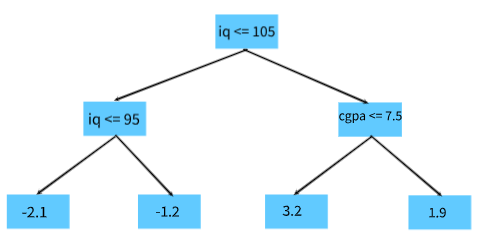<image>

Residuals of model 1:
1. $resid_{m1_1} = -2.1$
2. $resid_{m1_2} = -1.2$
3. $resid_{m1_3} = -1.2$
4. $resid_{m1_4} = 3.2$
5. $resid_{m1_5} = 1.9$

Now let's predict the output with M1 and M2:

$pred_1 = m1 + m2 = 5 - 2.1 = 2.9$

$pred_2 = m1 + m2 = 5 - 1.2 = 3.8$

$pred_3 = m1 + m2 = 5 - 1.2 = 3.8$


$pred_4 = m1 + m2 = 5 + 3.2 = 8.2$

$pred_5 = m1 + m2 = 5 + 1.9 = 6.9$

This problematic because the model is overfitting. To avoid overfitting we use the learning rate:

$pred_{m1} = m_1 + lr * m_2$

$lr = 0.1$, and predict for all students:

1. $pred_{m2_1} = m1 + m2 = 5 - (0.1*2.1) = 4.79$
2. $pred_{m2_2} = m1 + m2 = 5 - (0.1*2.1) = 4.88$
3. $pred_{m2_3} = m1 + m2 = 5 - (0.1*1.2) = 4.88$
4. $pred_{m2_4} = m1 + m2 = 5 + (0.1*3.2) = 5.32$
5. $pred_{m2_5} = m1 + m2 = 5 + (0.1*1.9) = 5.19$

That's how create more models and combine the results.

* **Calculate residual 2 [error by M2]**

1. $resid_{m2_1} = actual - pred = 3 - [5 + (0.1 * -2.1)] = -1.79$
2. $resid_{m2_2} = actual - pred = 4 - [5 + (0.1 * -1.2)] = -0.88$
3. $resid_{m2_3} = actual - pred = 3 - [5 + (0.1 * -1.2)] = -1.88$
4. $resid_{m2_4} = actual - pred = 8 - [5 + (0.1 * 3.2)] = 2.68$
5. $resid_{m2_5} = actual - pred = 7 - [5 + (0.1 * 1.9)] = 1.81$

Notice that $resid_1 \gt resid_2$ which means error keeps decreasing slowly as you go on adding more models.

* **Model 3 - Decision Tree**

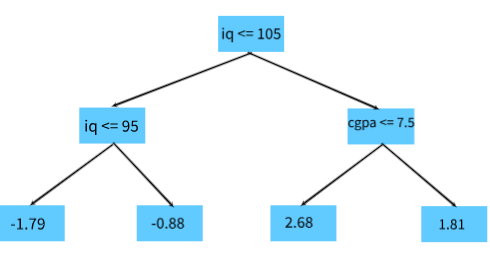

$pred = m_1 + m_2 * lr + m_3 * lr$

Predictions of model 3:

1. $pred_{m3_1} = m1 + m2*lr + m3*lr = 5 + (0.1*-2.1) + (0.1 * -1.79) = 4.611$
2. $pred_{m3_2} = m1 + m2*lr + m3*lr = 5 + (0.1*-1.2) + (0.1 * -0.88) = 4.792$
3. $pred_{m3_3} = m1 + m2*lr + m3*lr = 5 + (0.1*-1.2) + (0.1 * -1.88) = 4.792$
4. $pred_{m3_4} = m1 + m2*lr + m3*lr = 5 + (0.1*3.2) + (0.1 * 2.68) = 5.588$
5. $pred_{m3_5} = m1 + m2*lr + m3*lr = 5 + (0.1*1.9) + (0.1 * 1.81) = 5.371$

That's how predictions and residuals are calculated in gradient boosting.


>**Gradient Boosting in classification**

In case of classification as well the first model is a simple model and the prediction is calculated as:

$f(x) = f_0(x) + f_1(x) + ....... + f_n(x)$

$f_0 = \text {simple model}$

> **Stage 1: (Simple model):**

In case of classification, the simple model is log of odds:

$$f_0 = Log_(odds) = \frac {\text {no. of 1's}}{\text {no. of 0's}} log_e$$

* It returns the probabilities of the classes, therefore, we need to find the probability of f_0(x).
* It will be calculated as:
$$ pred = prob (f_0(x)) = \frac {1}{1 + e^{f_0(x)}}$$
* Next, calculate the residual $(actual - predicted)$

> **Stage 2: Create Decision Tree:**

* Here the decision tree is a regression tree since the output is continuous (error). \
$input$ = $x_1$, $x_2$ and $resid_1$

* The regression tree should be a weak learner. So, select max leaf node as 3 or 4.

* The model will be the combination of $f_0(x) + f_1(x)$. The prediction of this combined model will be $f_0(x)[log(odds)] + f_1(x)$.

* The trained decision tree is based on the inputs and output of $resid_1$, the output of this decision tree will be probabilties.

* We cannot subtract probabilities with first model's output since they are $log(odds)$. We need to convert the probabilities into $log(odds)$.

The formula to chnage probs into $log(odds)$

$$log(odds)_{converted_p} = \frac {\sum Residual} {\sum (previous_{prob}) * (1 - previous_{prob}))}$$

**Prediction**
The prediction will happen as :    
$pred = m_1 + m_2$

We then convert these odds back to probabilties using:

$$pred_{prob} = \frac {1}{1 + e^{log(odds)_{converted_p}}}$$

**Residual 2:**
The probabilities that we get helps in calculating the $resid_2$:
$y - [f_0(x_1) + f_1(x_1)]$

Then train second decision tree using $x1, x2, resid_2$

The process is continued till desired results.

If the difference between M1 and M2 is huge then learning rate can be used to control it. The final output should be probability.

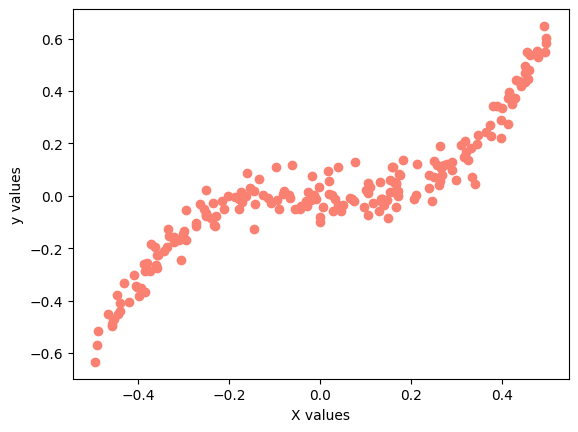

In [34]:
# Coding Regression Gradient boosting algorithm
X_data = np.random.rand(200, 1) - 0.5
y_data = y = 5 * X_data[:, 0]**3 + 0.05 * np.random.randn(200)

# Plot the data
plt.scatter(X_data, y_data, c= 'salmon')
plt.xlabel('X values')
plt.ylabel('y values')
plt.show()

In [35]:
data_frame = pd.DataFrame((X_data.reshape(200), y_data.reshape(200))).T
data_frame.columns = ['X','y']
data_frame

,X,y
0,-0.444358,-0.449039
1,-0.044796,-0.051126
2,-0.251308,-0.065259
3,-0.170817,-0.025187
4,0.475873,0.552138
...,...,...
195,-0.273236,-0.116295
196,0.137067,-0.011774
197,0.175147,0.079321
198,0.264571,0.055184


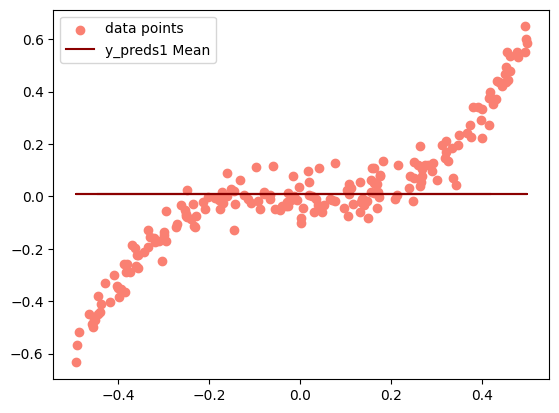

In [41]:
# Stage 1: Model 1 simple model in regression is just the mean of the data
data_frame['y_pred1'] = data_frame['y'].mean()

# Calculate the residuals for model1
data_frame['resid1'] = data_frame['y'] - data_frame['y_pred1']

# Lets plot the results
plt.scatter(data_frame['X'], data_frame['y'], color = 'salmon', label = 'data points')
plt.plot(data_frame['X'], data_frame['y_pred1'], color = 'darkred', label = 'y_preds1 Mean')
plt.legend()
plt.show()

In [43]:
data_frame

,X,y,y_pred,y_pred1,resid1
0,-0.444358,-0.449039,0.01099,0.01099,-0.460029
1,-0.044796,-0.051126,0.01099,0.01099,-0.062116
2,-0.251308,-0.065259,0.01099,0.01099,-0.076249
3,-0.170817,-0.025187,0.01099,0.01099,-0.036177
4,0.475873,0.552138,0.01099,0.01099,0.541148
...,...,...,...,...,...
195,-0.273236,-0.116295,0.01099,0.01099,-0.127285
196,0.137067,-0.011774,0.01099,0.01099,-0.022764
197,0.175147,0.079321,0.01099,0.01099,0.068331
198,0.264571,0.055184,0.01099,0.01099,0.044194


In [46]:
# generating X_test
X_test_dt = np.linspace(-0.5, 0.5, 500)

In [54]:
X_test_dt.shape

(500,)

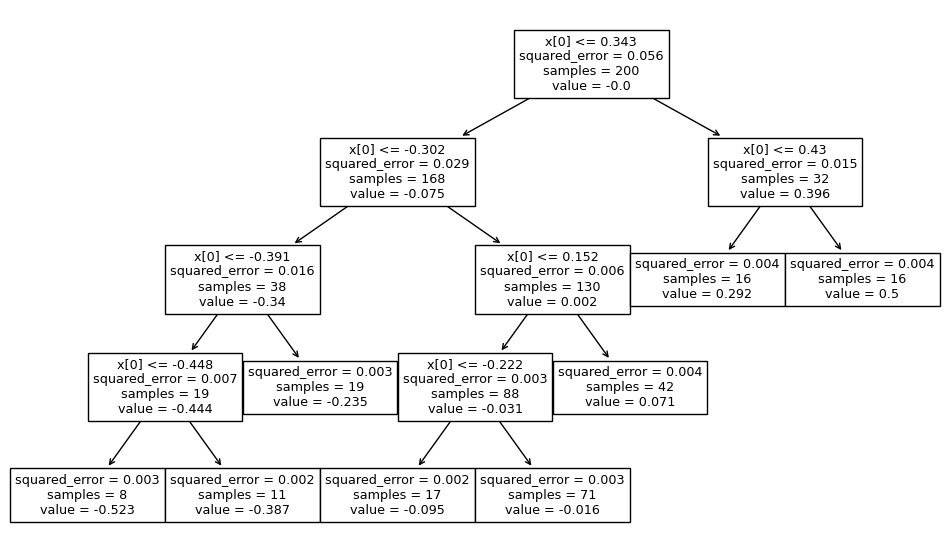

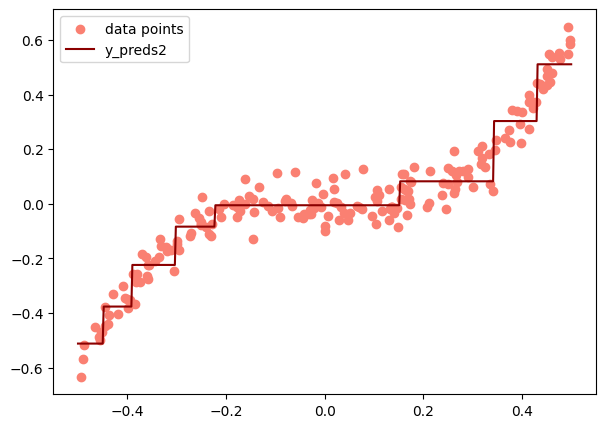

In [63]:
# Stage 2: Create model 2 using the decision tree
dt_m1 = DecisionTreeRegressor(max_leaf_nodes = 8)

# Fit the data with input X and residual 1
dt_m1.fit(data_frame['X'].values.reshape(200,1), data_frame['resid1'].values.reshape(200,1))

# Make the predictions (y_pred = m1 + m2*lr)
y_pred2 = data_frame['y'].mean() + dt_m1.predict(X_test_dt.reshape(500,1))
data_frame['y_pred2'] = data_frame['y'].mean() + dt_m1.predict(data_frame['X'].values.reshape(200,1))

# Calculate the residuals for model 2
data_frame['resid2'] = data_frame['y'] - data_frame['y_pred2']

# Plot the decision tree
plt.figure(figsize = (12,7))
plot_tree(dt_m1)
plt.show()

# Plot the predictions of the trained tree
plt.figure(figsize = (7, 5))
plt.scatter(data_frame['X'], data_frame['y'], color = 'salmon', label = 'data points')
plt.plot(X_test, y_pred2, color = 'darkred', label = 'y_preds2')
plt.legend()
plt.show()

In [64]:
data_frame

,X,y,y_pred,y_pred1,resid1,y_pred2,resid2
0,-0.444358,-0.449039,0.01099,0.01099,-0.460029,-0.376397,-0.072642
1,-0.044796,-0.051126,0.01099,0.01099,-0.062116,-0.005299,-0.045827
2,-0.251308,-0.065259,0.01099,0.01099,-0.076249,-0.083661,0.018402
3,-0.170817,-0.025187,0.01099,0.01099,-0.036177,-0.005299,-0.019888
4,0.475873,0.552138,0.01099,0.01099,0.541148,0.511065,0.041073
...,...,...,...,...,...,...,...
195,-0.273236,-0.116295,0.01099,0.01099,-0.127285,-0.083661,-0.032634
196,0.137067,-0.011774,0.01099,0.01099,-0.022764,-0.005299,-0.006476
197,0.175147,0.079321,0.01099,0.01099,0.068331,0.082414,-0.003093
198,0.264571,0.055184,0.01099,0.01099,0.044194,0.082414,-0.027229


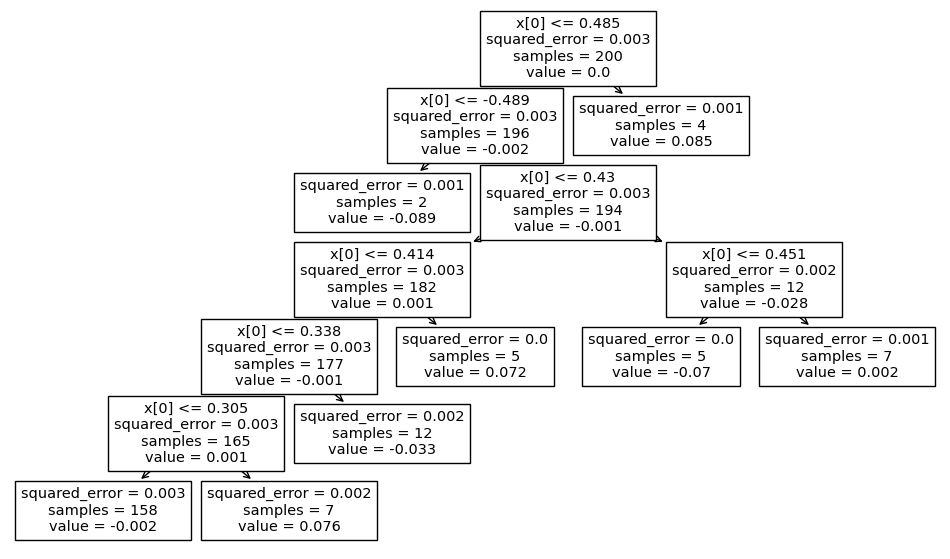

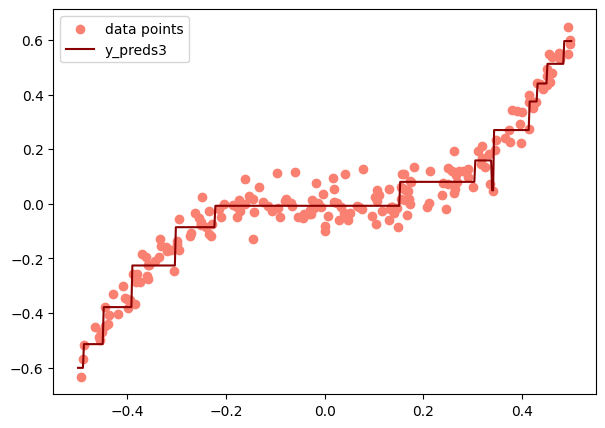

In [65]:
# Stage 3: Create model 3 using the decision tree
dt_m2 = DecisionTreeRegressor(max_leaf_nodes = 8)

# Fit the data with input X and residual 1
dt_m2.fit(data_frame['X'].values.reshape(200,1), data_frame['resid2'].values.reshape(200,1))

# Make the predictions (y_pred = m1 + m2*lr)
y_pred3 = data_frame['y'].mean() + sum(regressor.predict(X_test_dt.reshape(500,1)) for regressor in [dt_m1, dt_m2])
data_frame['y_pred3'] = data_frame['y'].mean() + sum(regressor.predict(data_frame['X'].values.reshape(200,1)) for regressor in [dt_m1, dt_m2])

# Calculate the residuals for model 2
data_frame['resid3'] = data_frame['y'] - data_frame['y_pred3']

# Plot the decision tree
plt.figure(figsize = (12,7))
plot_tree(dt_m2)
plt.show()

# Plot the predictions of the trained tree
plt.figure(figsize = (7, 5))
plt.scatter(data_frame['X'], data_frame['y'], color = 'salmon', label = 'data points')
plt.plot(X_test, y_pred3, color = 'darkred', label = 'y_preds3')
plt.legend()
plt.show()

In [66]:
data_frame

,X,y,y_pred,y_pred1,resid1,y_pred2,resid2,y_pred3,resid3
0,-0.444358,-0.449039,0.01099,0.01099,-0.460029,-0.376397,-0.072642,-0.378420,-0.070619
1,-0.044796,-0.051126,0.01099,0.01099,-0.062116,-0.005299,-0.045827,-0.007321,-0.043805
2,-0.251308,-0.065259,0.01099,0.01099,-0.076249,-0.083661,0.018402,-0.085683,0.020424
3,-0.170817,-0.025187,0.01099,0.01099,-0.036177,-0.005299,-0.019888,-0.007321,-0.017866
4,0.475873,0.552138,0.01099,0.01099,0.541148,0.511065,0.041073,0.512763,0.039375
...,...,...,...,...,...,...,...,...,...
195,-0.273236,-0.116295,0.01099,0.01099,-0.127285,-0.083661,-0.032634,-0.085683,-0.030612
196,0.137067,-0.011774,0.01099,0.01099,-0.022764,-0.005299,-0.006476,-0.007321,-0.004453
197,0.175147,0.079321,0.01099,0.01099,0.068331,0.082414,-0.003093,0.080391,-0.001070
198,0.264571,0.055184,0.01099,0.01099,0.044194,0.082414,-0.027229,0.080391,-0.025207


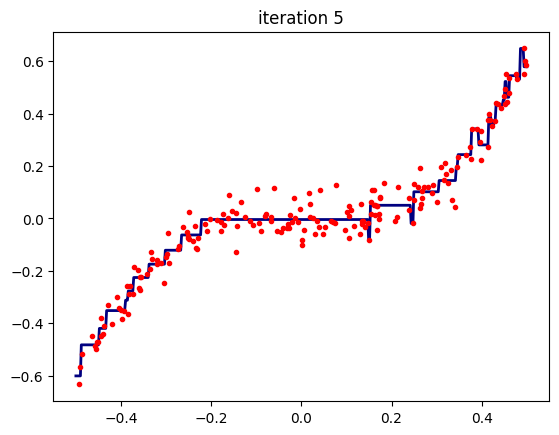

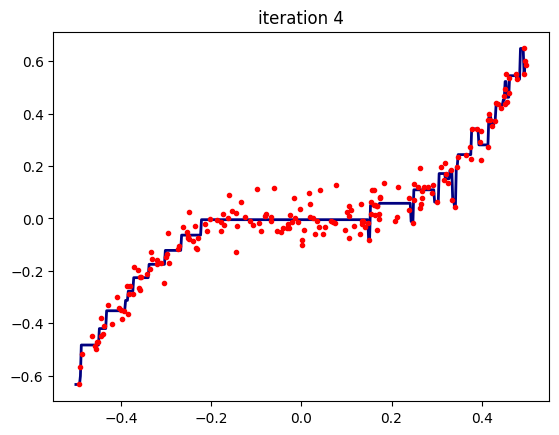

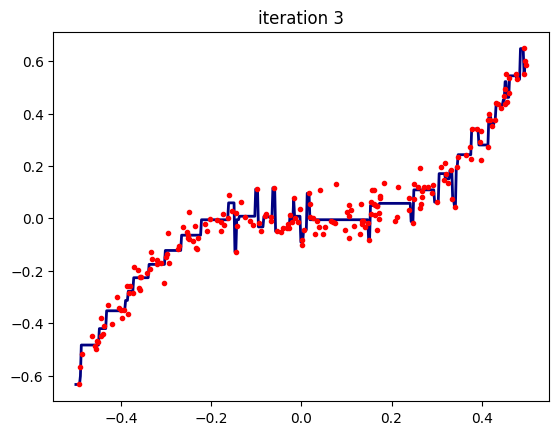

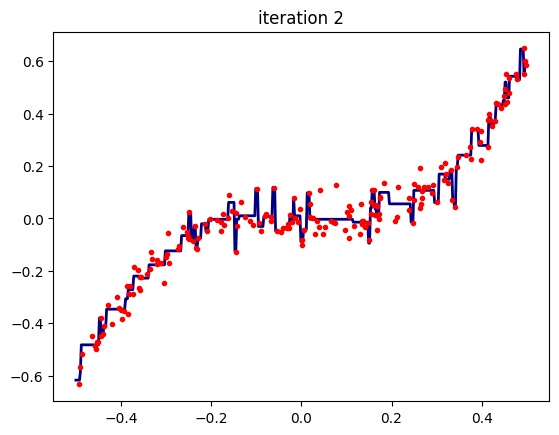

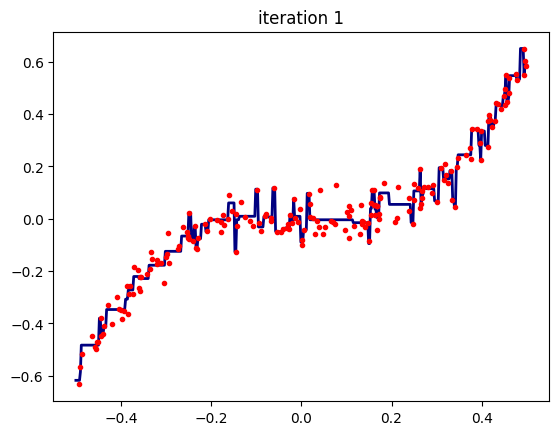

In [72]:
# Create a gradient boosting function for the above steps
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    plt.figure()
    plt.plot(x1, y_pred, c = 'navy', linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.title(f'iteration {number}')
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

# Call the gradient boosting function
gradient_boost(X_data, y_data, 5, lr=1)